In [1]:
import os
print(os.path.getsize('../data/Online Retail.xlsx') / 1024 / 1024, "MB")


22.616714477539062 MB


In [2]:
import pandas as pd
df = pd.read_excel('../data/Online Retail.xlsx', nrows=10)
print(df)


   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
%matplotlib inline

In [4]:
df = pd.read_excel('../data/Online Retail.xlsx')


In [5]:
df = pd.read_excel('../data/Online Retail.xlsx', nrows=5000)
print(df.shape)
df.head()


(5000, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    5000 non-null   object        
 1   StockCode    5000 non-null   object        
 2   Description  4988 non-null   object        
 3   Quantity     5000 non-null   int64         
 4   InvoiceDate  5000 non-null   datetime64[ns]
 5   UnitPrice    5000 non-null   float64       
 6   CustomerID   3795 non-null   float64       
 7   Country      5000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 312.6+ KB


In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,5000.000000,5000,5000.000000,3795.000000
mean,9.185800,2010-12-01 22:54:10.812000,3.792314,15906.281950
min,-9360.000000,2010-12-01 08:26:00,0.000000,12431.000000
25%,1.000000,2010-12-01 13:24:00,1.250000,14606.000000
50%,3.000000,2010-12-01 17:06:00,2.510000,15862.000000
75%,10.000000,2010-12-02 12:10:00,4.210000,17841.000000
max,2880.000000,2010-12-02 18:08:00,607.490000,18239.000000
std,144.940788,NaN,13.211720,1732.068892


In [8]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description      12
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1205
Country           0
dtype: int64

In [9]:
df_clean = df.dropna(subset=['Description'])
print("Shape after removing missing descriptions:", df_clean.shape)


Shape after removing missing descriptions: (4988, 8)


In [10]:
df_clean.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1193
Country           0
dtype: int64

In [11]:
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']
print("Total revenue in first 5000 rows:", df_clean['TotalPrice'].sum())

Total revenue in first 5000 rows: 102189.23999999999


C:\Users\A5\AppData\Local\Temp\ipykernel_23720\4206721559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']


In [12]:
df_clean.loc[:, 'TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']


In [13]:
top_products = df_clean['Description'].value_counts().head(10)
print(top_products)

Description
WHITE HANGING HEART T-LIGHT HOLDER     35
HAND WARMER UNION JACK                 34
RED WOOLLY HOTTIE WHITE HEART.         30
HAND WARMER SCOTTY DOG DESIGN          28
JAM MAKING SET PRINTED                 27
SET 7 BABUSHKA NESTING BOXES           26
KNITTED UNION FLAG HOT WATER BOTTLE    24
HAND WARMER OWL DESIGN                 24
HAND WARMER BIRD DESIGN                23
HAND WARMER RED RETROSPOT              22
Name: count, dtype: int64


In [14]:
top_countries = df_clean['Country'].value_counts().head(5)
print(top_countries)

Country
United Kingdom    4825
Norway              73
Germany             30
EIRE                24
France              20
Name: count, dtype: int64


In [15]:
print("Unique customers:", df_clean['CustomerID'].nunique())

Unique customers: 197


C:\Users\A5\AppData\Local\Temp\ipykernel_23720\916657066.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis', legend=False)


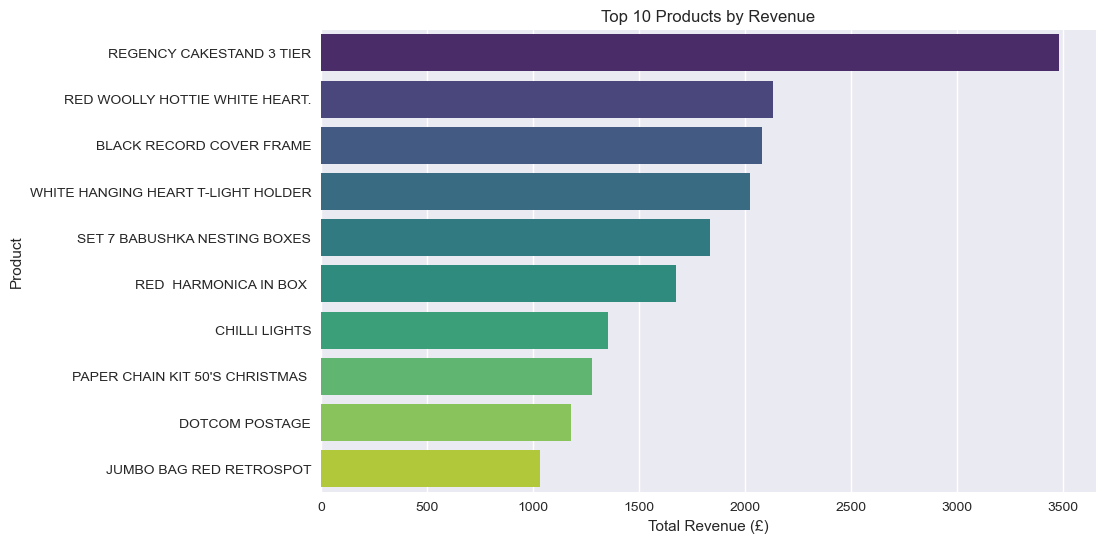

In [16]:
# Calculate total revenue per product
top_products = df_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis', legend=False)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Product')
plt.show()

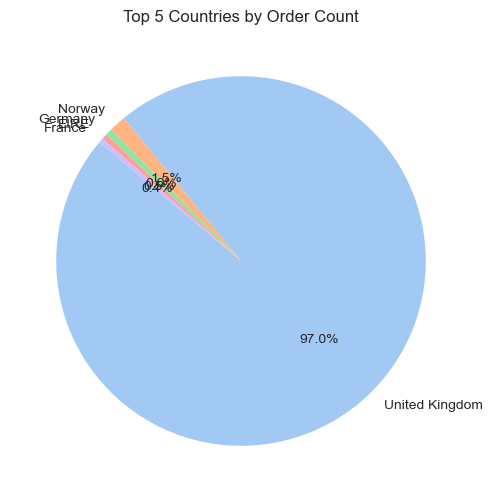

In [17]:

country_counts = df_clean['Country'].value_counts().head(5)

# Plot
plt.figure(figsize=(6,6))
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 Countries by Order Count')
plt.show()

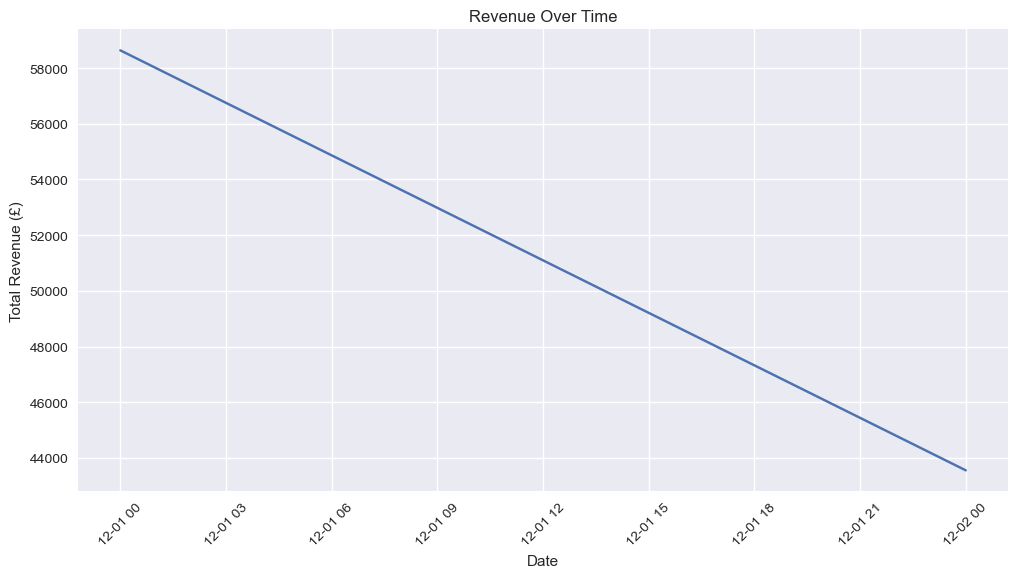

In [18]:
# Group by date (day-level)
daily_revenue = df_clean.groupby(df_clean['InvoiceDate'].dt.date)['TotalPrice'].sum()

# Plot
plt.figure(figsize=(12,6))
daily_revenue.plot()
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45)
plt.show()

# 📋 E-commerce Sales Analysis — Project Overview

**In this project, we analyze sales data from an online retail store to:**

1. Understand overall revenue
2. Find top selling products
3. Identify best customer segments
4. Explore which countries contribute most to sales

# 📦 Step 1: Load the data

**Loaded first 5000 rows from Online Retail.xlsx using pandas.**


# 🔍 Step 2: Data overview

Used:
df.info()
df.describe()
df.isnull().sum()

**To check:**

1. Number of rows & columns
2. Data types
3. Missing values


# 🧹 Step 3: Data cleaning

1. Dropped rows with missing Description
2. After cleaning: ~4988 rows left
3. Still ~1193 rows have missing CustomerID (we keep them for order-level analysis)


# 💰 Step 4: Add total price

**Added column:**

df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

**Then calculated:**

df_clean['TotalPrice'].sum()

**Total revenue in first 5000 rows: ~102,189**


# 🏆 Step 5: Top selling products

**Lists the 10 most frequently sold products.**

df_clean['Description'].value_counts().head(10)



# 🌍 Step 6: Top countries

**Shows countries with the most orders.**

df_clean['Country'].value_counts().head(5)


# 👥 Step 7: Unique customers

**Counts unique customers in this sample.**

df_clean['CustomerID'].nunique()


# 📊 Step 8: Visualizations

**Created charts to visualize insights:**

1. Top 10 selling products – bar chart
2. Top countries by number of orders – bar chart
3. Daily revenue trend – line chart

These visuals help identify trends, best markets, and popular products.

---

# ✅ Conclusion

**We now have:**

1. Total revenue
2. Top products
3. Top countries
4. Number of unique customers
5. Clear visualizations to communicate insights

In [19]:
df_clean.to_csv('../data/Online_Retail_Clean.csv', index=False)